In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('higgs_data_cleansed.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.0,...,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000
1,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.0,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
2,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.0,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
3,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.0,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
4,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.0,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233


In [4]:
X = df.iloc[:,1:]
Xl = df.iloc[:,1:22]
Xh = df.iloc[:,22:]
Y = df.iloc[:,0]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(Xl,Y,test_size=0.25, random_state=42)
Xh_train, Xh_test, Yh_train, Yh_test = train_test_split(Xh,Y,test_size=0.25, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    'n_estimators': randint(20,200),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
}

rf = RandomForestClassifier(random_state=42)
rfl = RandomForestClassifier(random_state=42)
rfh = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator = rf, param_distributions=params, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_searchl = RandomizedSearchCV(estimator = rfl, param_distributions=params, n_iter=50,cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_searchh = RandomizedSearchCV(estimator = rfh, param_distributions=params, n_iter=50,cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [13]:
random_search.fit(X_train, Y_train);
random_searchl.fit(Xl_train, Yl_train);
random_searchh.fit(Xh_train, Yh_train);

In [14]:
print(f'Best accuracy using every column: {random_search.best_score_}')
print(f'Best parameters using every column: {random_search.best_params_}')
print(f'Best accuracy for Low Level: {random_searchl.best_score_}')
print(f'Best parameters for Low Level: {random_searchl.best_params_}')
print(f'Best accuracy for High Level: {random_searchh.best_score_}')
print(f'Best parameters for High Level: {random_searchh.best_params_}')

Best accuracy using every column: 0.7100488481820705
Best parameters using every column: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 143}
Best accuracy for Low Level: 0.6060668887038579
Best parameters for Low Level: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 177}
Best accuracy for High Level: 0.6980513461004718
Best parameters for High Level: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 148}


In [15]:
Y_pred = random_search.predict(X_test)
Yl_pred = random_searchl.predict(Xl_test)
Yh_pred = random_searchh.predict(Xh_test)

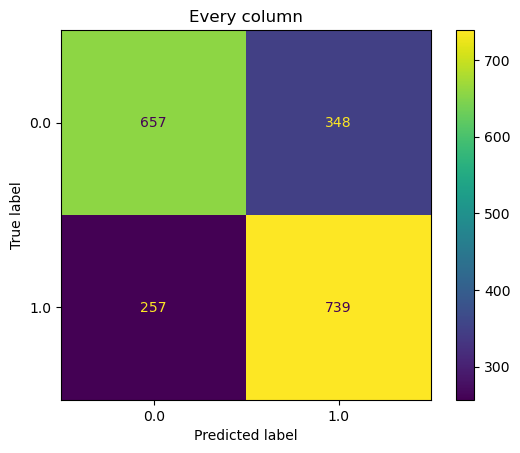

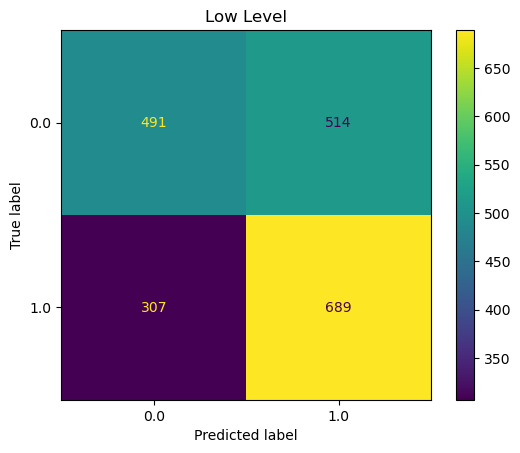

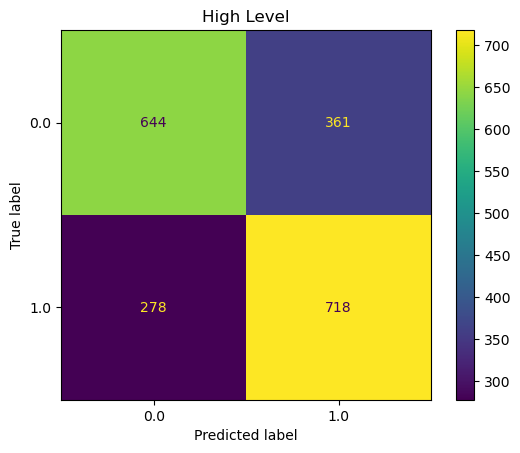

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
cml = confusion_matrix(Yl_test,Yl_pred)
cmh = confusion_matrix(Yh_test, Yh_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.classes_)
displ = ConfusionMatrixDisplay(confusion_matrix=cml, display_labels=random_searchl.classes_)
disph = ConfusionMatrixDisplay(confusion_matrix=cmh, display_labels=random_searchh.classes_)

disp.plot()
plt.title('Every column')
#plt.savefig('cm.png')
plt.show()

displ.plot()
plt.title('Low Level')
#plt.savefig('cm_low.png')
plt.show()

disph.plot()
plt.title('High Level')
#plt.savefig('cm_high.png')
plt.show()

In [18]:
print(f'Every Column Accuracy score = {accuracy_score(Y_test,Y_pred)}')
print(f'Low Level Accuracy score = {accuracy_score(Yl_test,Yl_pred)}')
print(f'High Level Accuracy score = {accuracy_score(Yh_test,Yh_pred)}')

Every Column Accuracy score = 0.6976511744127936
Low Level Accuracy score = 0.5897051474262869
High Level Accuracy score = 0.6806596701649176


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred_prob = random_search.predict_proba(X_test)
Y_test_01 = pd.factorize(Y_test)[0].tolist()
fpr, tpr, thresholds = roc_curve(Y_test_01, Y_pred_prob[:,1]) 

Yl_pred_prob = random_searchl.predict_proba(Xl_test)
Yl_test_01 = pd.factorize(Yl_test)[0].tolist()
fprl, tprl, thresholdsl = roc_curve(Yl_test_01, Yl_pred_prob[:,1]) 

Yh_pred_prob = random_searchh.predict_proba(Xh_test)
Yh_test_01 = pd.factorize(Yh_test)[0].tolist()
fprh, tprh, thresholdsh = roc_curve(Yh_test_01, Yh_pred_prob[:,1]) 

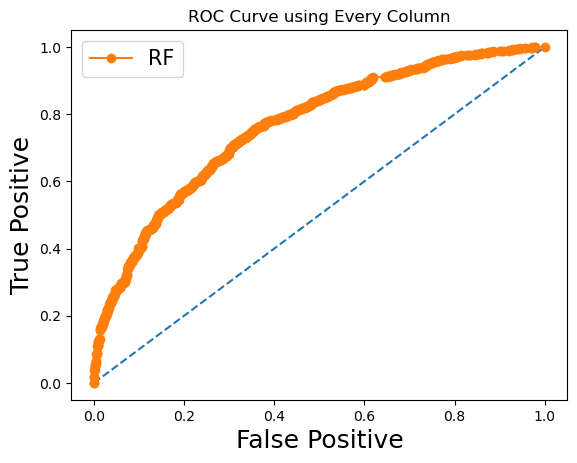

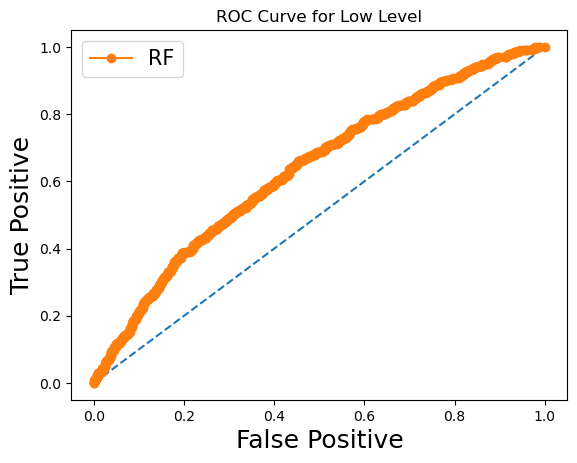

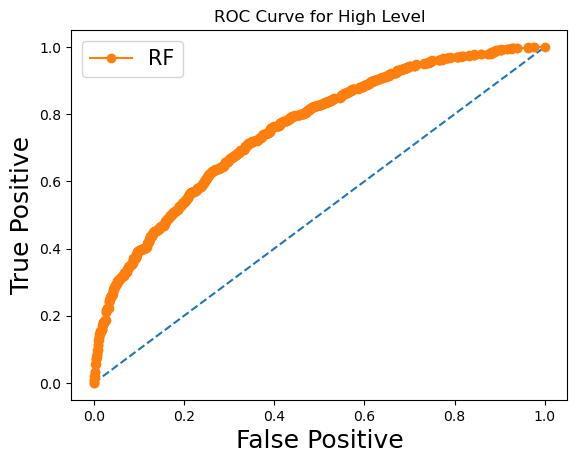

In [21]:
plt.plot([0,1], [0,1], '--')
plt.plot(fpr,tpr, 'o-', label='RF')
plt.title('ROC Curve using Every Column')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
#plt.savefig('roc_curve.png')
plt.show()

plt.plot([0,1], [0,1], '--')
plt.plot(fprl,tprl, 'o-', label='RF')
plt.title('ROC Curve for Low Level')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
#plt.savefig('roc_curve_low.png')
plt.show()

plt.plot([0,1], [0,1], '--')
plt.plot(fprh,tprh, 'o-', label='RF')
plt.title('ROC Curve for High Level')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
#plt.savefig('roc_curve_high.png')
plt.show()

In [22]:
print(f'Every Column AUC score: {roc_auc_score(Y_test, Y_pred_prob[:,1])}') 
print(f'Low Level AUC score: {roc_auc_score(Yl_test, Yl_pred_prob[:,1])}') 
print(f'High Level AUC score: {roc_auc_score(Yh_test, Yh_pred_prob[:,1])}') 

Every Column AUC score: 0.764676616915423
Low Level AUC score: 0.6370596815121181
High Level AUC score: 0.7550180822793663
